
{{% alert warning %}}It is recommended to read the tutorial on [using pyDSA on a single image](../pydsa/index.html) before doing this tutorial.{{% /alert %}}

This tutorial presents how to use pyDSA to analyze videos of drops. 
The video used is a side-view of a drop during an inflation-deflation sequence.

## Importing a video

Importing works in the same way than for an image.


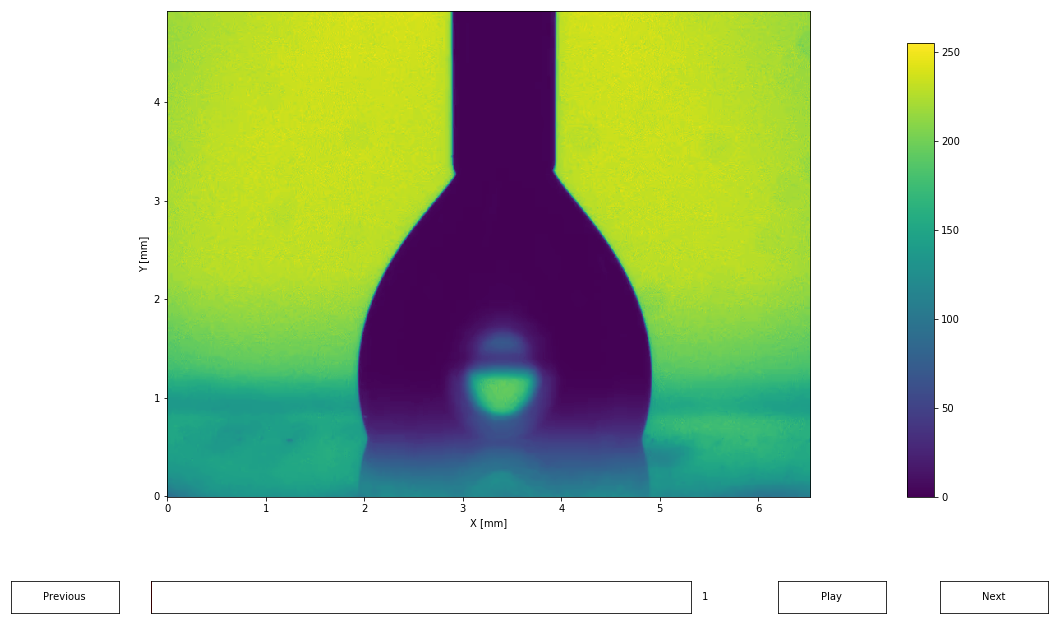

In [2]:
import pyDSA as dsa   
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 9

# Import an image
ims = dsa.import_from_video('data/video.mp4',
                            dx=1/120, dy=1/120, dt=1/10,
                            unit_x='mm', unit_y='mm', unit_t='s',
                            incr=10)
# Display
ims.display()
plt.show()

## Scaling
As for an image, you can specify the scaling during the import (as it is done here), or by
using the interactive function `ims.scale_interactive()`.

## Detecting the edges and contact angles

The method is similar than for a single image: we set the baseline, detect the edges, fit the edges, and compute the contact angles.

As presented in the [pyDSA image tutorial](../pydsa/index.html), different type of fittings are available:
- Spline
- Polynomial
- Circle
- Ellipse
- Multiple circles

We will be using the spline fitting here:

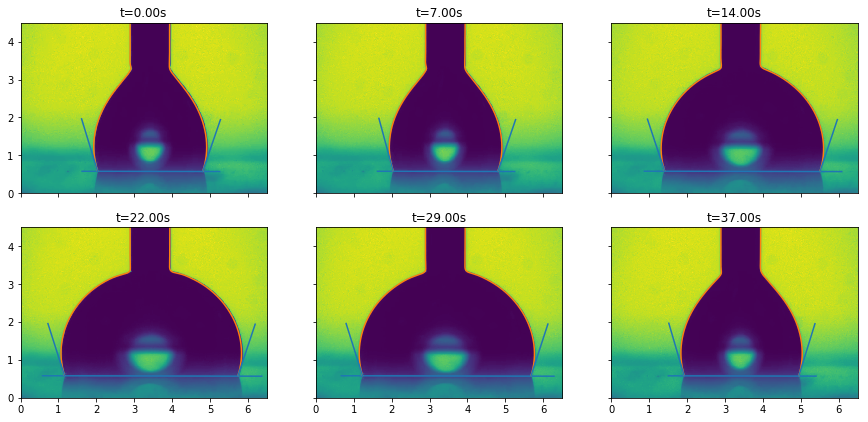

In [11]:
ims.set_baseline([0.0, 0.583],
                 [6.492, 0.57])
edges = ims.edge_detection()
fits = edges.fit_spline()
fits.compute_contact_angle()

# Display
fig, axs = plt.subplots(2, 3, figsize=(15, 6.9), sharex=True, sharey=True)
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    ind = int(i/5*(len(ims) - 1))
    ims[ind]._display()
    fits[ind].display()
    plt.xlabel('')
    plt.ylabel('')
    plt.title('t={:.2f}s'.format(ims.times[ind]))
plt.xlim(0, 6.5)
plt.ylim(0, 4.5)
plt.show()

## Plotting the drop properties evolution

We can then display a summary of the drop properties evolution.
The following function will display:
- the evolution of the drop edge contact with the surface (blue and yellow in the first figure)
- the evolution of the drop base length (green in the first figure)
- the evolution of the contact angles (blue and yellow in the second figure)

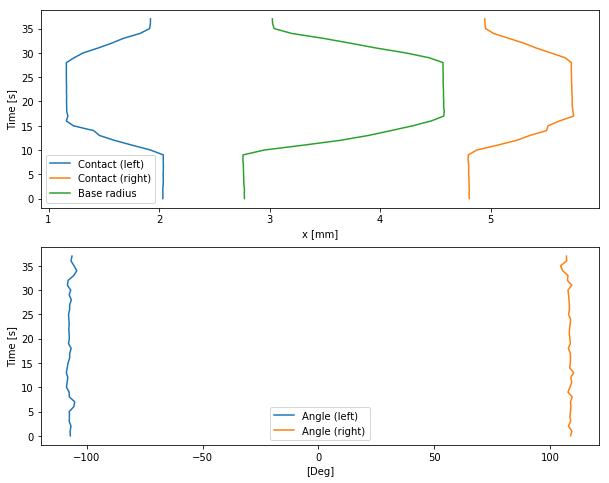

In [12]:
fits.display_summary(figsize=(10, 8))
plt.show()

## Accessing the drop properties

We can also extract the numeric values of those properties, 
if we want to do further processing on them.

{{% alert info %}}Angles are defined in the trigonometric sens, from the horizontal line.{{% /alert %}}

In [13]:
thetas = fits.get_contact_angles()
print("=== Left contact angle: ===")
print(thetas[:, 0])
print("\n=== Right contact angle: ===")
print(thetas[:, 1])

radius = fits.get_base_diameter()
print("\n=== Drop base diameter: ===")
print(radius)

=== Left contact angle: ===
[107.12413524 107.2256323  106.8389965  107.61289737 107.51142226
 107.57276364 105.62953427 105.23144587 107.55277592 107.66401919
 108.77097434 108.52915265 108.19716091 108.86385993 108.45840366
 108.11872607 107.43318801 107.37802132 106.76612957 107.92113095
 107.57457138 107.64618411 107.7956656  107.61428678 107.77428584
 107.89692038 107.43138843 107.37972004 106.70456297 107.6173274
 106.97438733 108.39064801 108.09762817 105.66737104 104.35097272
 105.53252132 106.82710145 106.41737082]

=== Right contact angle: ===
[71.15835736 70.62338871 72.12690458 71.10917987 71.46088435 71.19212707
 71.00712376 71.19449554 70.45508103 72.29992073 71.45324263 70.65348578
 71.07857174 69.86998847 71.54808159 71.27592401 71.19708308 71.25220752
 72.14233178 71.25019314 71.4840981  71.70291529 71.63233732 71.36244349
 71.13926384 72.04490637 71.6763298  71.69389988 71.84434718 72.03632988
 72.27500458 70.6757763  72.51274596 72.29308195 74.57313961 75.53117754
 7